In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
from datetime import datetime
from matplotlib import dates as mdates
from bs4 import BeautifulSoup as bs

url1 = 'https://finance.naver.com/item/sise_day.nhn?code=005930' # 네이버 금융 -> 삼성전자
headers = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/130.0.0.0 Safari/537.36'}
response = requests.get(url1,headers= headers)
response.text

'\n<html lang="ko">\n<head>\n<meta http-equiv="Content-Type" content="text/html; charset=euc-kr">\n<title>네이버페이 증권</title>\n\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20241104162211/css/newstock.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20241104162211/css/common.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20241104162211/css/finance_header.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20241104162211/css/layout.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20241104162211/css/main.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20241104162211/css/newstock2.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20241104162211/css/newstock3.css">\n<link rel="st

In [147]:
html = bs(response.text, 'html.parser')  #html 데이터 저장
html_table = html.select("table")  #table 태그 선택
table = pd.read_html(str(html_table))  


C:\Users\ddongjun\AppData\Local\Temp\ipykernel_10308\3673396135.py:3: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(str(html_table))


In [110]:
table[0].dropna() # 결측값 삭제

,날짜,종가,전일비,시가,고가,저가,거래량
1,2024.11.08,57000.0,하락 500,58000.0,58300.0,57000.0,13451844.0
2,2024.11.07,57500.0,상승 200,56900.0,58100.0,56800.0,17043102.0
3,2024.11.06,57300.0,하락 300,57600.0,58000.0,56300.0,22092218.0
4,2024.11.05,57600.0,"하락 1,100",57800.0,58100.0,57200.0,17484474.0
5,2024.11.04,58700.0,상승 400,58600.0,59400.0,58400.0,15586947.0
9,2024.11.01,58300.0,하락 900,59000.0,59600.0,58100.0,19083180.0
10,2024.10.31,59200.0,상승 100,58500.0,61200.0,58300.0,35809196.0
11,2024.10.30,59100.0,하락 500,59100.0,59800.0,58600.0,19838511.0
12,2024.10.29,59600.0,"상승 1,500",58000.0,59600.0,57300.0,28369314.0
13,2024.10.28,58100.0,"상승 2,200",55700.0,58500.0,55700.0,27775009.0


In [ ]:
df = pd.DataFrame()
sise_url = 'https://finance.naver.com/item/sise_day.nhn?code=005930'  
for page in range(1, 99):
    page_url = '{}&page={}'.format(sise_url, page)
    print(page_url)

    # 위에서 했던 일련의 과정들을 각 url에 대해서 30페이지에 대해서 반복
    response = requests.get(page_url, headers=headers)
    html = bs(response.text, 'html.parser')
    html_table = html.select("table")
    table = pd.read_html(str(html_table))

    # 현재 얻은 데이터프레임을 기존 데이터프레임에 누적
    df = pd.concat([df, table[0].dropna()], ignore_index=True)
    df = df.dropna()
    df = df.iloc[0:100] 
    df = df.sort_values(by='날짜')


In [112]:
df

,날짜,종가,전일비,시가,고가,저가,거래량
0,2024.06.13,78600.0,"상승 2,100",78400.0,79000.0,77800.0,33763804.0
1,2024.06.14,79600.0,"상승 1,000",79700.0,80500.0,79000.0,22926612.0
2,2024.06.17,78100.0,"하락 1,500",79200.0,79500.0,78000.0,16123051.0
3,2024.06.18,79800.0,"상승 1,700",78700.0,80200.0,78600.0,18207598.0
4,2024.06.19,81200.0,"상승 1,400",81100.0,82500.0,80500.0,24168863.0
...,...,...,...,...,...,...,...
95,2024.11.04,58700.0,상승 400,58600.0,59400.0,58400.0,15586947.0
96,2024.11.05,57600.0,"하락 1,100",57800.0,58100.0,57200.0,17484474.0
97,2024.11.06,57300.0,하락 300,57600.0,58000.0,56300.0,22092218.0
98,2024.11.07,57500.0,상승 200,56900.0,58100.0,56800.0,17043102.0


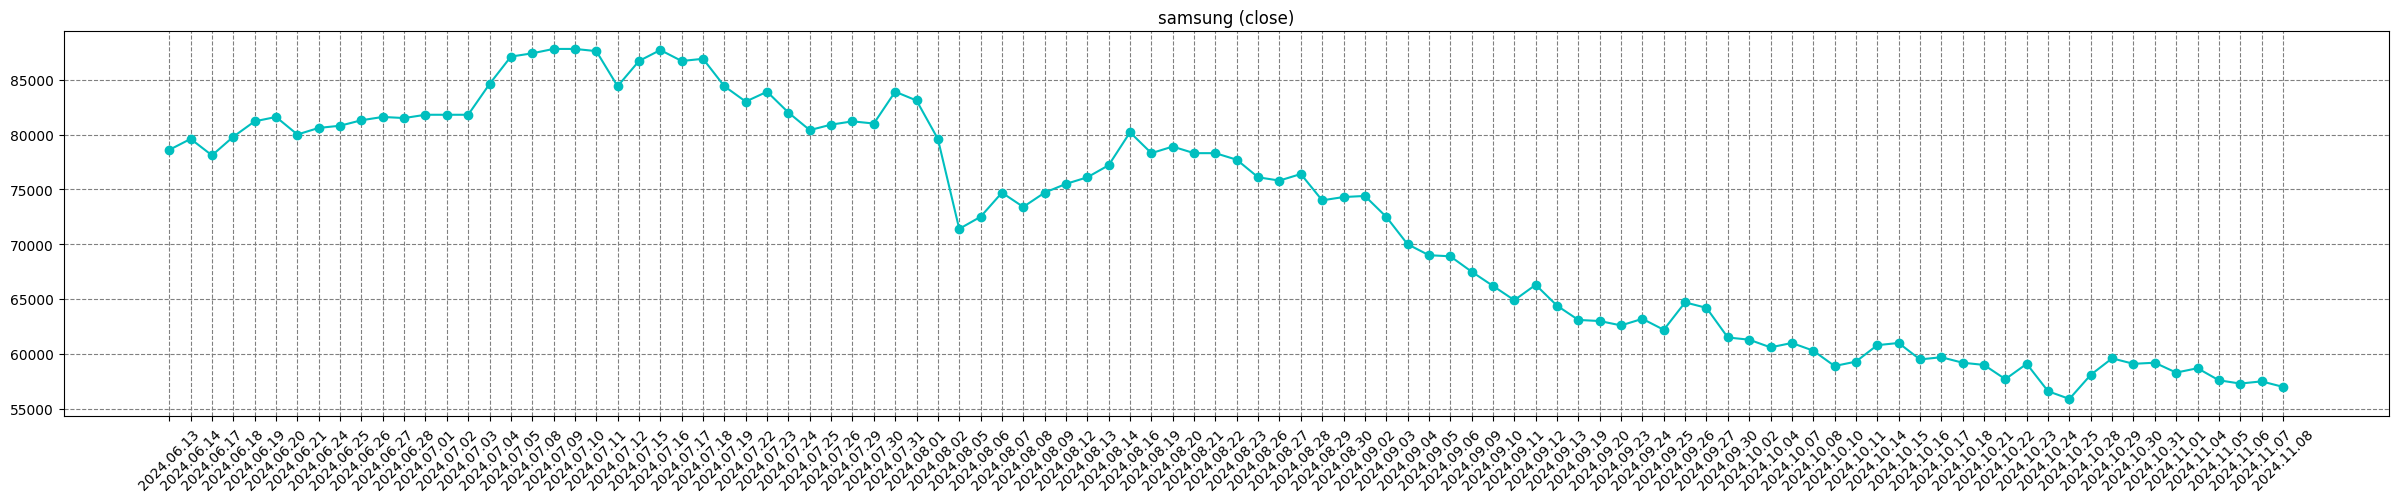

In [116]:
plt.figure(figsize=(30, 5)) 
plt.title('samsung (close)')
plt.xticks(rotation=45) 
plt.plot(df['날짜'], df['종가'], 'co-')
plt.grid(color='gray', linestyle='--')
plt.show()

In [ ]:
df2 = pd.DataFrame()
sise_url2 = 'https://finance.naver.com/item/sise_day.nhn?code=000660' 
for page in range(1, 99):
    page_url2 = '{}&page={}'.format(sise_url2, page)
    response2 = requests.get(page_url2, headers=headers)
    html2 = bs(response2.text, 'html.parser')
    html_table2 = html2.select("table")
    table2 = pd.read_html(str(html_table2))

    # 현재 얻은 데이터프레임을 기존 데이터프레임에 누적
    df2 = pd.concat([df2, table2[0].dropna()], ignore_index=True)
    df2 = df2.dropna()
    df2 = df2.iloc[0:100] 
    df2 = df2.sort_values(by='날짜')


In [152]:
df2

,날짜,종가,전일비,시가,고가,저가,거래량
0,2024.06.13,222000.0,"상승 7,000",226000.0,226500.0,219000.0,5777279.0
1,2024.06.14,221000.0,"하락 1,000",225000.0,225000.0,216000.0,3311223.0
2,2024.06.17,223000.0,"상승 2,000",219000.0,229500.0,219000.0,2198340.0
3,2024.06.18,234500.0,"상승 11,500",227000.0,234500.0,227000.0,3136231.0
4,2024.06.19,233500.0,"하락 1,000",235000.0,243000.0,231500.0,3758652.0
...,...,...,...,...,...,...,...
95,2024.11.04,194000.0,"상승 11,800",185200.0,194000.0,183700.0,3569575.0
96,2024.11.05,193200.0,하락 800,193600.0,198800.0,192100.0,3560310.0
97,2024.11.06,195800.0,"상승 2,600",197700.0,199200.0,192700.0,3460361.0
98,2024.11.07,197400.0,"상승 1,600",197400.0,198300.0,193100.0,2976546.0


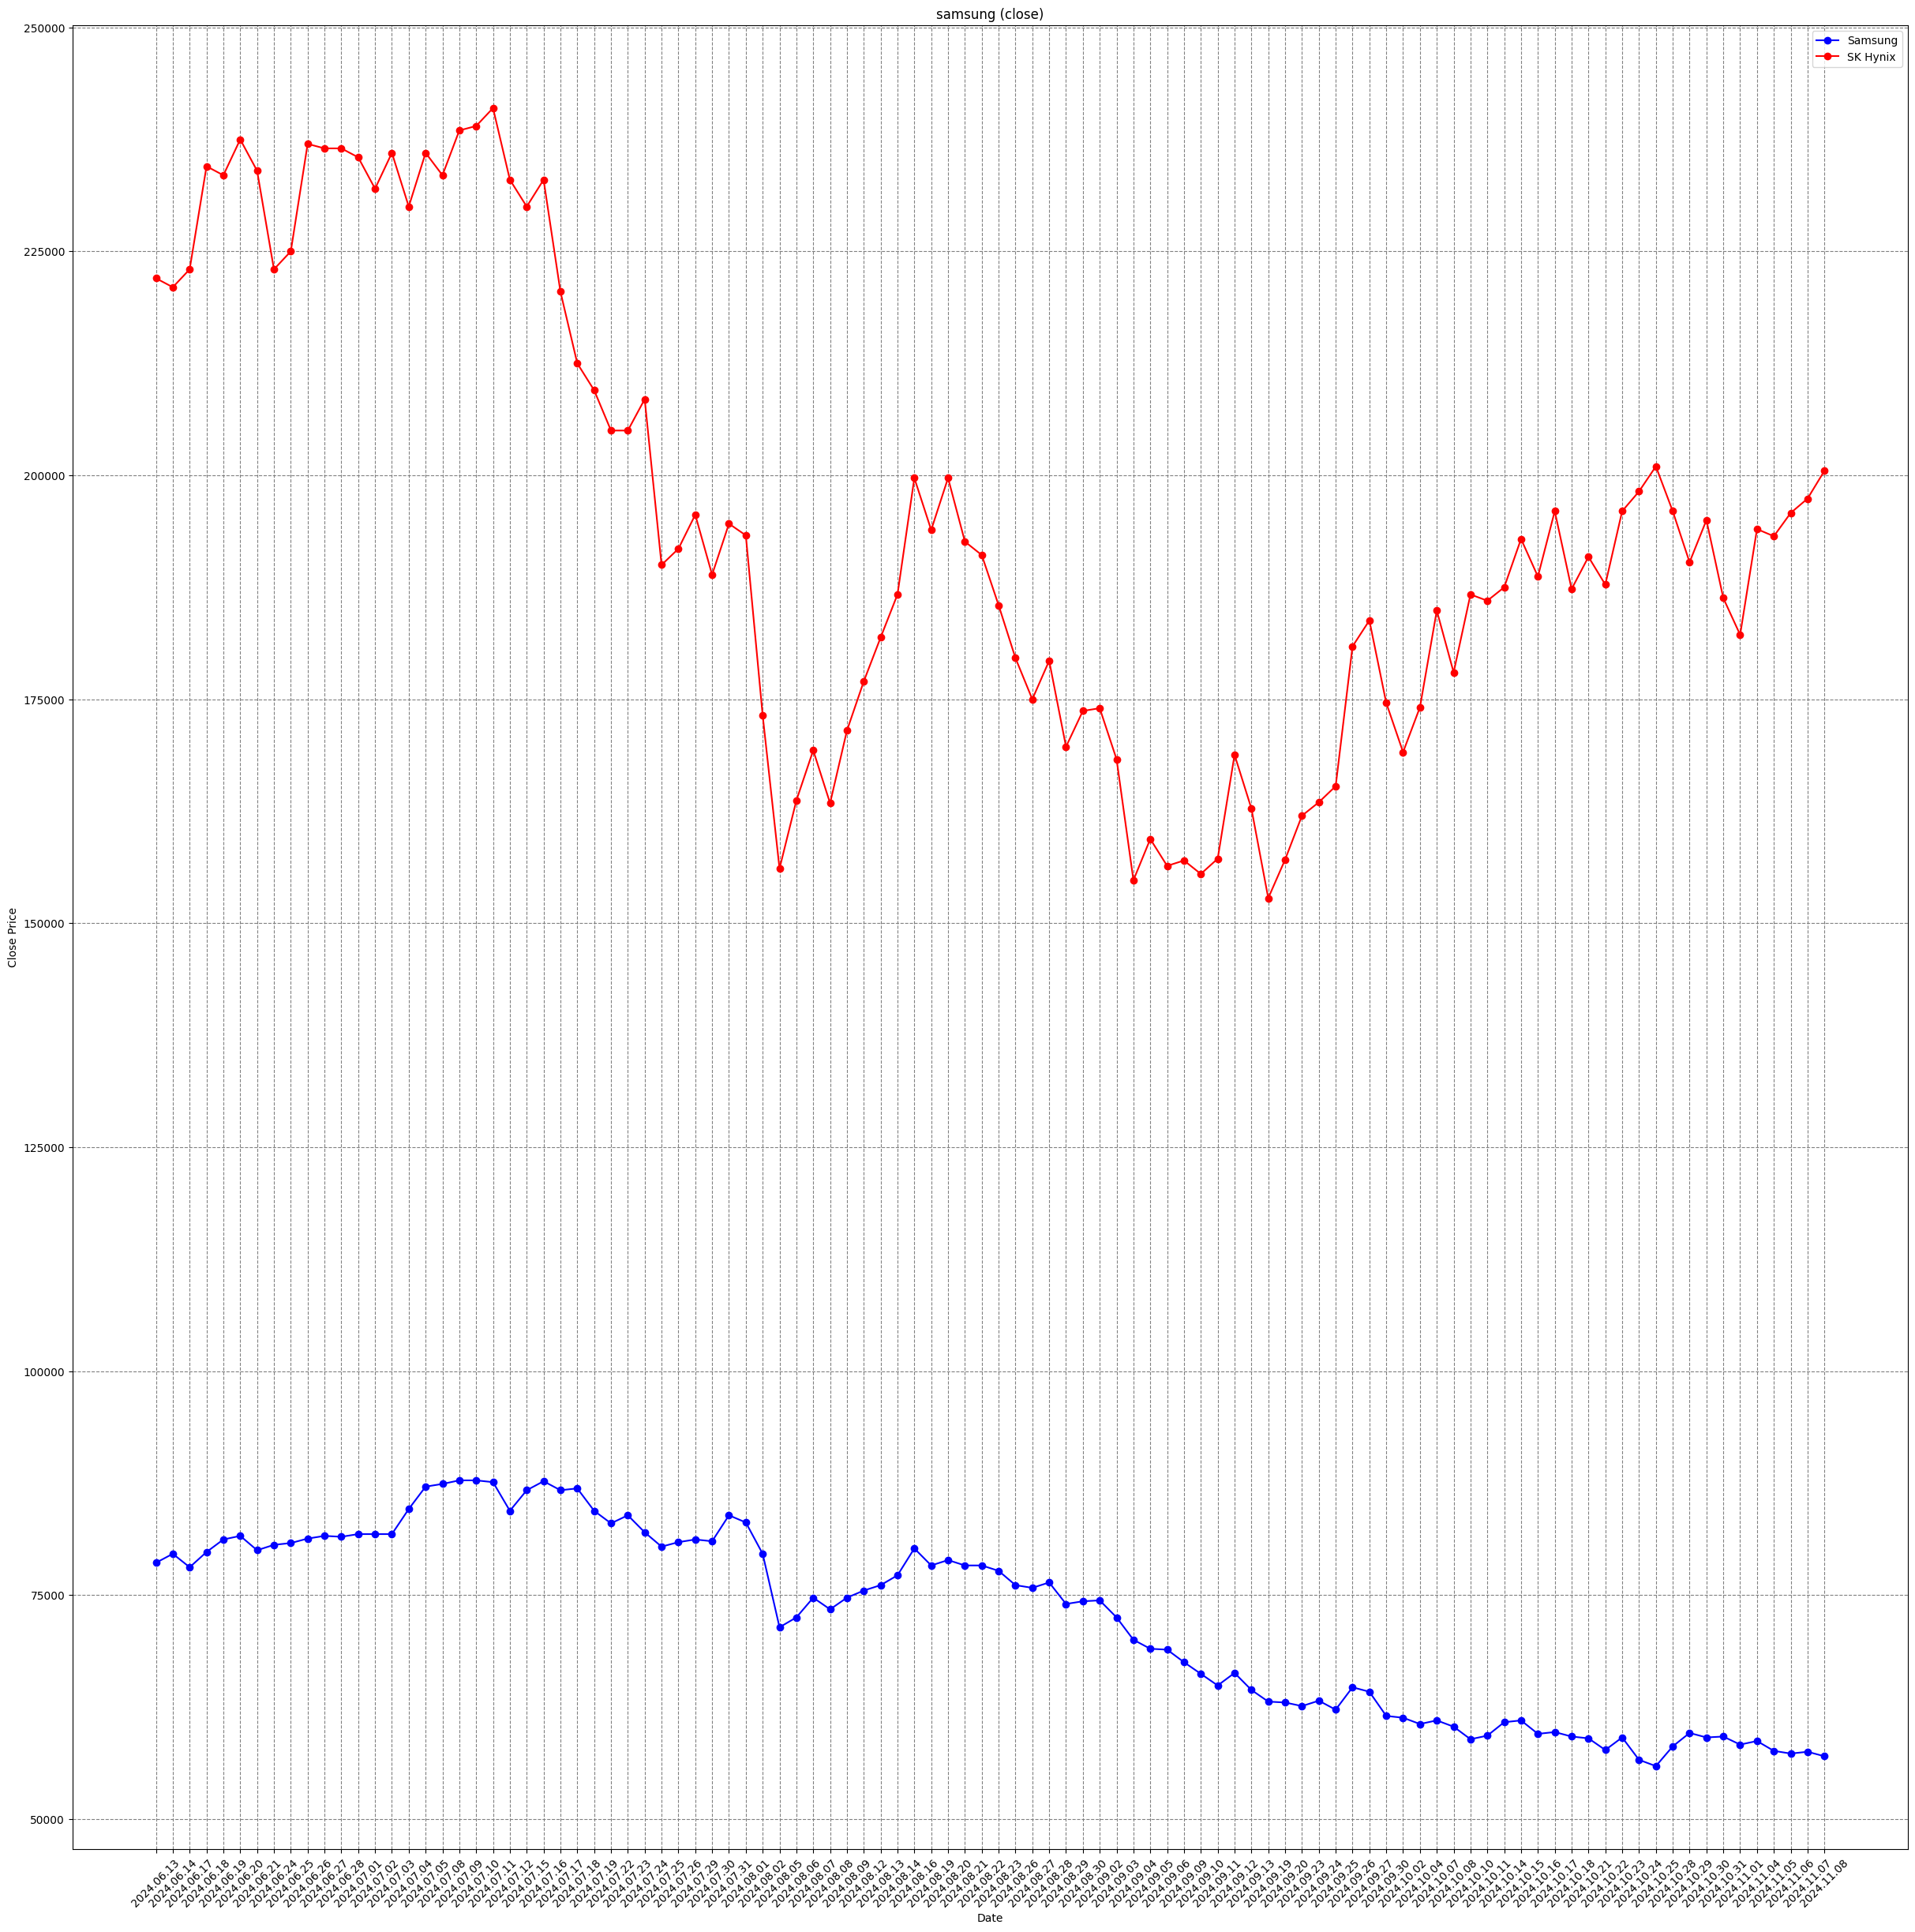

In [161]:
plt.figure(figsize=(30, 30)) 
plt.title('samsung (close)')
plt.xticks(rotation=45) 
plt.plot(df['날짜'], df['종가'], color='blue', marker='o', label='Samsung')
plt.plot(df2['날짜'], df2['종가'], color='red', marker='o', label='SK Hynix')
plt.grid(color='gray', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()